In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import nan

In [13]:
data = pd.read_csv('data_owid_16AUGUST.csv')
dates = list(data[data['location'] == 'France']['date'][-502:])
locations = ['Brazil', 'France', 'Germany', 'Israel', 'United Kingdom', 'United States']

In [20]:

R = 3
a = 0.25
mu_range = np.logspace(-8,-2,50)

def calc_single_probability(mu, new_cases, RMT):
    RMT = np.nan_to_num(RMT)
    RMT[RMT<1]=1
    P_time = 1-np.prod([(1-mu*(1-1/list(RMT)[t]))**list(new_cases)[t] for t in range(len(new_cases))])  
    return(P_time)

def calc_probability(mu_range, new_cases, RMT):
    RMT = np.nan_to_num(RMT)
    RMT[RMT<1]=1
    P_time = [1-np.prod([(1-mu*(1-1/list(RMT)[t]))**list(new_cases)[t] for t in range(len(new_cases))]) for mu in mu_range]
    return(P_time)

def calc_midpoint(t_limit, mu_range, new_cases, RMT):
    RMT = np.nan_to_num(RMT)
    RMT[RMT<1]=1    
    P_time = [1-np.prod([(1-mu*(1-1/list(RMT)[t]))**list(new_cases)[t] for t in range(t_limit)]) for mu in mu_range]
    midpoint = np.searchsorted(P_time, 0.5)
    return(midpoint)

In [21]:
    
all_data = {}

for loc in locations:
    all_data[loc] = {}
    population_size = np.array(data[data['location'] == loc]['population'])[0]
    
    # new cases
    new_cases = data[data['location'] == loc]['new_cases'][-502:].fillna(0)
    new_cases[new_cases<0] = 0
    
    all_data[loc]['dates'] = dates
    all_data[loc]['new_cases'] = new_cases
    
    cases = np.cumsum(new_cases)
    vaccinations = np.cumsum(data[data['location'] == loc]['new_vaccinations_smoothed_per_million'])[-502:]
    susceptible = np.ones(502)*population_size - cases - np.nan_to_num(vaccinations)
    
    all_data[loc]['recovered'] = cases
    all_data[loc]['vaccinated'] = vaccinations
    all_data[loc]['susceptible'] = susceptible
    
    # RWT
    RWT = data[data['location'] == loc]['reproduction_rate'][-502:]
    all_data[loc]['RWT'] = RWT
    
    # RMT q=1
    beta = (R*a)/population_size
    social_distancing = (a*RWT.fillna(1))/(beta*susceptible)
    RMT = (beta*social_distancing*population_size)/a
    all_data[loc]['RMT'] = RMT   

In [33]:
all_data['France']['dates'][501]

'2021-08-15'

In [29]:
probas_june = {}
for loc in locations:
    new_cases = all_data[loc]['new_cases'][:120]
    RMT = all_data[loc]['RMT'][:120]
    probas_june[loc] = calc_probability(mu_range, new_cases, RMT)
    
probas_august = {}
for loc in locations:
    new_cases = all_data[loc]['new_cases'][:502]
    RMT = all_data[loc]['RMT'][:502]
    probas_august[loc] = calc_probability(mu_range, new_cases, RMT)
    
all_midpoints = {}
for loc in locations:
    print(loc)
    new_cases = all_data[loc]['new_cases'][:502]
    RMT = all_data[loc]['RMT'][:502]
    all_midpoints[loc] = [calc_midpoint(t_limit, mu_range, new_cases, RMT) for t_limit in range(502)]    

Brazil
France
Germany
Israel
United Kingdom
United States


In [30]:
all_midpoints

{'Brazil': [50,
  42,
  40,
  38,
  37,
  37,
  36,
  35,
  35,
  34,
  34,
  33,
  33,
  33,
  33,
  32,
  32,
  32,
  31,
  31,
  31,
  31,
  30,
  30,
  30,
  29,
  29,
  29,
  29,
  28,
  28,
  28,
  28,
  28,
  27,
  27,
  27,
  27,
  26,
  26,
  26,
  26,
  26,
  26,
  25,
  25,
  25,
  25,
  25,
  24,
  24,
  24,
  24,
  24,
  24,
  23,
  23,
  23,
  23,
  23,
  23,
  23,
  23,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,


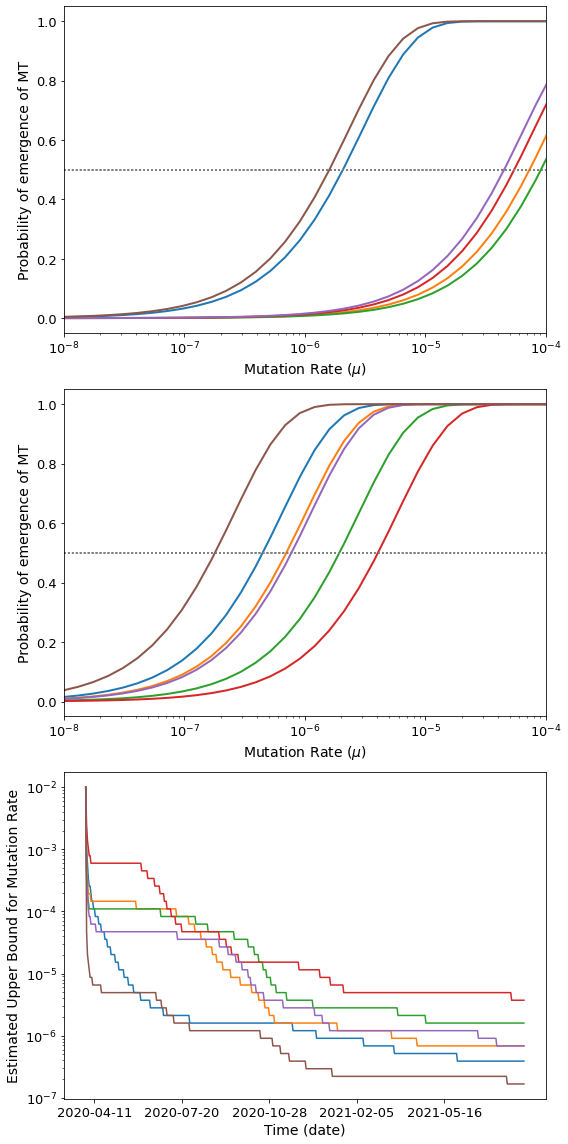

In [34]:
fig, ax = plt.subplots(3,1,figsize=(8,16))

## until July 30th, 2020
for loc in locations:
    ax[0].plot(mu_range, probas_june[loc], linewidth = 2.)
    ax[0].set_xscale('log')
    ax[0].set_xlim(1e-8, 1e-4)
    ax[0].set_xlabel('Mutation Rate ($\mu$)', fontsize = 14)
    ax[0].set_ylabel('Probability of emergence of MT', fontsize = 14)
    ax[0].axhline(0.5, linestyle = 'dotted', c = 'grey')

## until August 15th, 2021
for loc in locations:
    ax[1].plot(mu_range, probas_august[loc], linewidth = 2.)
    ax[1].set_xscale('log')
    ax[1].set_xlim(1e-8, 1e-4)
    ax[1].set_xlabel('Mutation Rate ($\mu$)', fontsize = 14)
    ax[1].set_ylabel('Probability of emergence of MT', fontsize = 14)
    ax[1].axhline(0.5, linestyle = 'dotted', c = 'grey')

## Upper Bound of MRate
for loc in locations:
    ax[2].plot(dates, [mu_range[x-1] for x in all_midpoints[loc]])
    ax[2].set_xticks(np.arange(10,len(dates),100))
    ax[2].set_yscale('log')
    ax[2].set_xlabel('Time (date)', fontsize = 14)
    ax[2].set_ylabel('Estimated Upper Bound for Mutation Rate', fontsize = 14)

for i in range(3):
    ax[i].tick_params(labelsize=13)

plt.tight_layout()
plt.savefig('Updated_Upper_Bound_September.jpg', dpi = 400)

In [37]:
mu_range[all_midpoints['United States'][-1]]

2.2229964825261955e-07